# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from sklearn.linear_model import LinearRegression

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?"

city_id = []
city_name = []
country = []
lat = []
lng = []
temp = []
humidity = []
max_temp = []
min_temp = []
wind = []
cloud = []
counter = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q="
    response = requests.get(query_url + city).json()
    try:
        city_id.append(response['id'])
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        lat.append(response["coord"]["lat"])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        counter = counter + 1
    except KeyError:
          print("No city found")

weather_df = pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Min Temp": min_temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloudiness": cloud
})
weather_df = weather_df.dropna()
weather_df.head()

No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found
No city found


,City,Country,Latitude,Longitude,Temperature,Max Temp,Min Temp,Humidity,Wind Speed,Cloudiness
0,Conceição do Araguaia,BR,-8.26,-49.26,299.87,299.87,299.87,80,0.89,78
1,Saskylakh,RU,71.92,114.08,255.83,255.83,255.83,90,6.68,19
2,Leningradskiy,RU,69.38,178.42,262.49,262.49,262.49,87,1.78,94
3,Albany,US,42.60,-73.97,280.48,283.15,277.59,34,6.70,75
4,Hobart,AU,-42.88,147.33,282.98,284.26,279.82,62,4.10,75


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.to_csv('./Resources/city_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

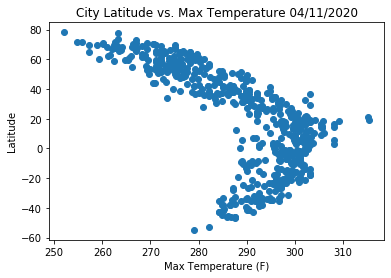

In [5]:
#gmaps.configure(api_key=g_key)

#fig = gmaps.figure()
plt.scatter(max_temp, lat)
plt.title('City Latitude vs. Max Temperature 04/11/2020')
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

#### Latitude vs. Humidity Plot

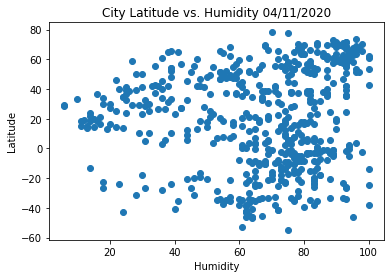

In [6]:
plt.scatter(humidity, lat)
plt.title('City Latitude vs. Humidity 04/11/2020')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

#### Latitude vs. Cloudiness Plot

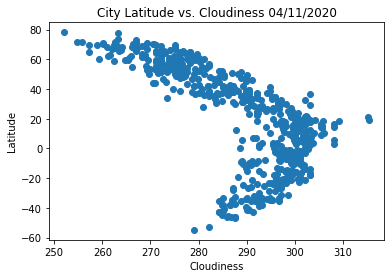

In [7]:
plt.scatter(max_temp, lat)
plt.title('City Latitude vs. Cloudiness 04/11/2020')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

#### Latitude vs. Wind Speed Plot

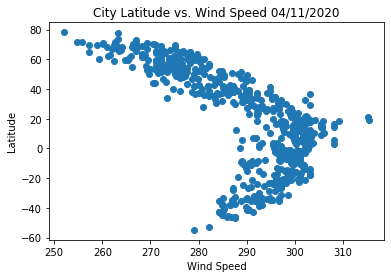

In [8]:
plt.scatter(max_temp, lat)
plt.title('City Latitude vs. Wind Speed 04/11/2020')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
for temp in max_temp:
    temp.to_numeric()
    lat.to_numeric()
    lng.to_numeric()

#m_slope, m_int, m_r, m_p, m_std_err = linregress(lat, max_temp)
#m_fit = m_slope * max_temp + m_int

plt.scatter(lat, max_temp)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.plot(lat,m_fit,"--")
plt.ylabel('Max Temperature')
plt.show()

AttributeError: 'float' object has no attribute 'to_numeric'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression